[SMiles ARbitrary Target Specification (SMARTS)](https://en.wikipedia.org/wiki/Smiles_arbitrary_target_specification) is a language used for pattern searching in molecules.  SMARTS takes its cue from [regular expressions](https://en.wikipedia.org/wiki/Regular_expression), which allow for character matching in text strings.  Simply put, a sequence of characters in a regular expression defines a search pattern.  For example, in a regular expression the vertical bar character, |, is boolean operator meaning "or".  Using python's `re.py` module we can find matches.

<!-- TEASER_END -->

In [1]:
import re

pattern = r"(Dan|Don)"

string1 = "His name is Dan."
result1 = re.search(pattern, string1).group()

string2 = "No, his name is Don."
result2 = re.search(pattern, string2).group()

print("Result 1 is {0}, result 2 is {1}".format(result1, result2))

Result 1 is Dan, result 2 is Don


Using a set of "character logic" we can search for strings, or substrings, that meet some predefined criterion.  A full set of examples of regular expression including character meanings can be found in the [python docs](https://docs.python.org/3/library/re.html).

SMARTS allows us to do the same thing except with molecules.  Following the rules of [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) and by using reserved characters, SMARTS gives us the ability to identify molecules containing specific features.  Here is a list of some common SMARTS characters.

<CENTER>
<TABLE BORDER>
<CAPTION><B>SMARTS Atomic Primitives<SUP><SMALL>1</SMALL></SUP></B></CAPTION>

<TR>
  <TH>Symbol</TH>
  <TH>Symbol name</TH>
  <TH>Atomic property requirements</TH>
  <TH>Default</TH>
</TR>

<TR>
  <TD>* </TD>
  <TD>wildcard</TD>
  <TD>any atom</TD>
  <TD>(no default)</TD>
</TR>

<TR>
  <TD>a</TD>
  <TD>aromatic</TD>
  <TD>aromatic</TD>
  <TD>(no default)</TD>
</TR>

<TR>
  <TD>A</TD>
  <TD>aliphatic</TD>
  <TD>aliphatic </TD>
  <TD>(no default)</TD>
</TR>

<TR>
  <TD>D&lt;n&gt;</TD>
  <TD>degree</TD>
  <TD>&lt;n&gt; explicit connections</TD>
  <TD>exactly one</TD>
</TR>

<TR>
  <TD>H&lt;n&gt;</TD>
  <TD>total-H-count</TD>
  <TD>&lt;n&gt; attached hydrogens</TD>
  <TD>exactly one</TD>
</TR>

<TR>
  <TD>h&lt;n&gt;</TD>
  <TD>implicit-H-count</TD>
  <TD>&lt;n&gt; implicit hydrogens</TD>
  <TD>at least one</TD>
</TR>

<TR>
  <TD>R&lt;n&gt;</TD>
  <TD>ring membership</TD>
  <TD>in &lt;n&gt; SSSR rings</TD>
  <TD>any ring atom</TD>
</TR>

<TR>
  <TD>r&lt;n&gt; </TD>
  <TD>ring size</TD>
  <TD>in smallest SSSR ring of size &lt;n&gt;</TD>
  <TD>any ring atom</TD>
</TR>

<TR>
  <TD>v&lt;n&gt;</TD>
  <TD>valence</TD>
  <TD>total bond order &lt;n&gt; </TD>
  <TD>exactly one</TD>
</TR>

<TR>
  <TD>X&lt;n&gt;</TD>
  <TD>connectivity</TD>
  <TD>&lt;n&gt; total connections</TD>
  <TD>exactly one</TD>
</TR>

<TR>
  <TD>x&lt;n&gt;</TD>
  <TD>ring connectivity</TD>
  <TD>&lt;n&gt; total ring connections</TD>
  <TD>at least one</TD>
</TR>

<TR>
  <TD>- &lt;n&gt;</TD>
  <TD>negative charge</TD>
  <TD>-&lt;n&gt; charge</TD>
  <TD>-1 charge (-- is -2, etc)</TD>
</TR>

<TR>
  <TD>+&lt;n&gt;</TD>
  <TD>positive charge</TD>
  <TD>+&lt;n&gt; formal charge</TD>
  <TD>+1 charge (++ is +2, etc)</TD>
</TR>

<TR>
  <TD>#n</TD>
  <TD>atomic number</TD>
  <TD>atomic number &lt;n&gt;</TD>
  <TD>(no default)</TD>
</TR>

<TR>
  <TD>@</TD>
  <TD>chirality</TD>
  <TD>anticlockwise</TD>
  <TD>anticlockwise, default class</TD>
</TR>

<TR>
  <TD>@@</TD>
  <TD>chirality</TD>
  <TD>clockwise</TD>
  <TD>clockwise, default class</TD>
</TR>

<TR>
  <TD>@&lt;c&gt;&lt;n&gt;</TD>
  <TD>chirality</TD>
  <TD>chiral class &lt;c&gt; chirality &lt;n&gt;</TD>
  <TD>(nodefault)</TD>
</TR>

<TR>
  <TD>@&lt;c&gt;&lt;n&gt;?</TD>
  <TD>chiral or unspec</TD>
  <TD>chirality &lt;c&gt;&lt;n&gt; or unspecified</TD>
  <TD>(no default)</TD
</TR>

<TR>
  <TD>&lt;n&gt;</TD>
  <TD>atomic mass</TD>
  <TD>explicit atomic mass</TD>
  <TD>unspecified mass</TD>
</TR>

<P>

<CENTER>
<TABLE BORDER>
<B>Examples<SUP><SMALL>1</SMALL></SUP>:</B><P>

<TR>
  <TD>C</TD>
  <TD>aliphatic carbon atom</TD>
</TR>

<TR>
  <TD>c</TD>
  <TD>aromatic carbon atom</TD>
</TR>

<TR>
  <TD>a</TD>
  <TD>aromatic atom</TD>
</TR>

<TR>
  <TD>[#6]</TD>
  <TD>carbon atom</TD>
</TR>

<TR>
  <TD>[Ca]</TD>
  <TD>calcium atom</TD>
</TR>

<TR>
  <TD>[++]</TD>
  <TD>atom with a +2 charge</TD>
  <TD>
</TR>

<TR>
  <TD>[R]</TD>
  <TD>atom in any ring</TD>
</TR>

<TR>
  <TD>[D3]</TD>
  <TD>atom with 3 explicit bonds (implicit H's don't count)</TD>
</TR>

<TR>
  <TD>[X3]</TD>
  <TD>atom with 3 total bonds (includes implicit H's)</TD>
</TR>

<TR>
  <TD>[v3]</TD>
  <TD>atom with bond orders totaling 3 (includes implicit H's)</TD>
</TR>

<TR>
  <TD>C[C@H](F)O</TD>
  <TD>match chirality (H-F-O anticlockwise viewed from C)</TD>
</TR>

<TR>
  <TD>C[C@?H](F)O</TD>
  <TD>matches if chirality is as specified or is not specified</TD>
</TR>
</TABLE>
</CENTER>

<B><SUP><SMALL>1</SMALL></SUP>http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html</B>

In my opinion, things are always best explained by visualization.  So using RDKit. we can see how SMARTS works using 13 random compounds.

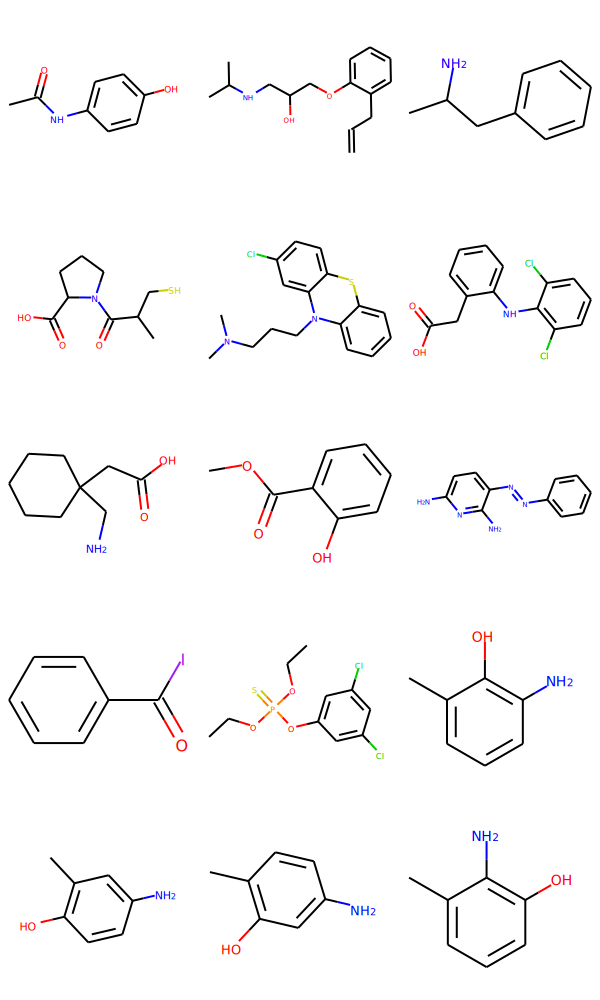

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

some_chemicals =[
                'CC(=O)Nc1ccc(O)cc1',
                'CC(C)NCC(O)COc1ccccc1CC=C',
                'CC(N)Cc1ccccc1',
                'CC(CS)C(=O)N1CCCC1C(=O)O',
                'CN(C)CCCN1c2ccccc2Sc3ccc(Cl)cc13',
                'OC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl',
                'NCC1(CC(=O)O)CCCCC1',
                'COC(=O)c1ccccc1O',
                'Nc1ccc(N=Nc2ccccc2)c(N)n1',
                'IC(=O)c1ccccc1',
                'CCOP(=S)(OCC)Oc1cc(Cl)cc(Cl)c1',
                'c1c(C)c(O)c(N)cc1',
                'Oc1c(C)cc(N)cc1',
                'Oc1c(C)ccc(N)c1',
                'c1c(C)c(N)c(O)cc1',
                ]

some_chemicals = list(map(Chem.MolFromSmiles, some_chemicals))
SVG(Draw._MolsToGridSVG(some_chemicals))

So let's begin exploring SMARTS using the first chemical, which has the SMILES string (`C(=O)Nc1ccc(O)cc1`).

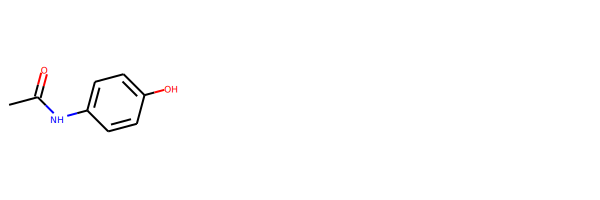

In [3]:
mol = some_chemicals[0]
SVG(Draw._MolsToGridSVG([mol]))

Let's say we were looking to find all the aliphatic carbons.  We could do that using SMARTS and some RDKit functionality.  Since SMARTS uses the same syntax as SMILES we can find aliphatic carbons using the uppercase c character, so the SMARTS string would look like this `[C]`.  We can create an RDKit Mol object from SMARTS.

In [4]:
smart_mol = Chem.MolFromSmarts('[C]')
Chem.MolToSmarts(smart_mol)

'C'

We can use this as a substructure to query our target molecule.

In [5]:
mol.HasSubstructMatch(smart_mol)

True

We can also retrieve the indices of atoms matching our SMARTS query.

In [6]:
mol.GetSubstructMatches(smart_mol)

((0,), (1,))

Now, let's highlight these atoms in our molecule.

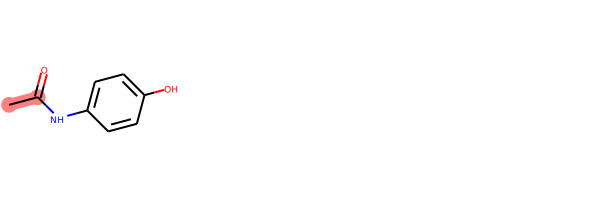

In [7]:
highlightAtomLists = [atom[0] for atom in  mol.GetSubstructMatches(smart_mol)]
SVG(Draw._MolsToGridSVG([mol], highlightAtomLists=[highlightAtomLists]))

Awesome!  Using a SMARTS string we found all the aliphatic carbon atoms in our target molecule.  And as we can see, the only two aliphatic carbons in the above molecule are part of the `CC(=O)Nc` substructure.  

However, there are other ways to go about hitting those atoms which lets us delve into SMARTS a little more.  For example, we can see the terminal carbon atom is saturated and its only non-hydrogen bond is a carbon atom with four total connections, none of which are hydrogens.  Which is an expression that can be created using SMARTS with the string `[X4;H3][X3;H0]`

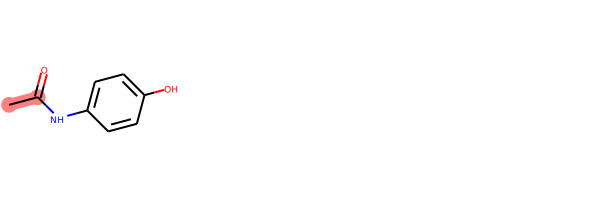

In [8]:
smrt_mol = Chem.MolFromSmarts('[X4;H3][X3;H0]')
highlightAtomLists = [atom[0] for atom in  mol.GetSubstructMatches(smart_mol)]
SVG(Draw._MolsToGridSVG([mol], highlightAtomLists=[highlightAtomLists]))

Looking more closely at the SMARTS string, `[X4;H3][X3;H0]`, we describe two atoms (everything between `[]`), where we are saying the first atom must have four total connections `X4` AND (using the symbol `;`) must be attached to three hydrogens, `H3`.  Similarly, the second atom, `[X3;H0]` hits any atom that that has three total connections with no hydrogen.  We can see our second atom has three connections and no hydrogen due to the doubly-bonded oxygen.  

However, this is a very specific query.  This isn't going to hit all aliphatic carbons.  Fortunately, there are easier ways to go about this in SMARTS.  Let's look at the SMARTS query we were using before but how RDKit outputs it. 

In [9]:
Chem.MolToSmarts(smrt_mol)

'[X4&H3]-,:[X3&H0]'

This looks slightly different than our original query, `[X4;H3][X3;H0]`, namely with the three characters seperating our two atoms, `-,:`.  Since, we did not explicitly designate a bond between the two atoms RDKit assumed we dont care if the bond is a single bond (`-`) OR (`,`) an aromatic bond (`:`), hence the characters between our atoms.  Bond types can also be searched with characters for single (`-`), double (`=`), triple (`#`), aromatic (`:`), ring bond (`@`), or any (`~`).  

So we could make our original query more appropriate like so: `[#6]!:[#6]`.  Any atom with atomic number 6 (i.e., carbon) connected by a bond that is not (`!`) aromatic.  Let's find all aliphatic (non-aromatic) carbon atoms in our original small data set.  

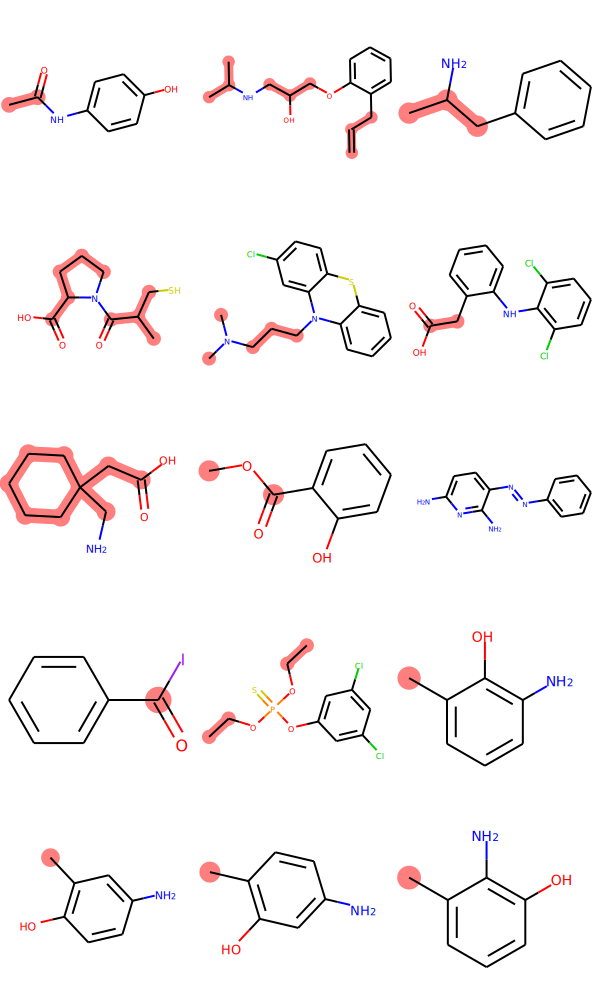

In [10]:
smrt_mol = Chem.MolFromSmarts('[#6]!:[#6]')
highlightAtomLists = [[atom[0] for atom in  mol.GetSubstructMatches(smart_mol)] for mol in some_chemicals]
SVG(Draw._MolsToGridSVG(some_chemicals, highlightAtomLists=highlightAtomLists))

And that's pretty much it.  As I start to use them more, I will come up with some more complex examples and experiments and post them here.  